In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import requests
from math import sqrt
import matplotlib.pyplot as plt

%matplotlib inline
from talib import  BBANDS


C:\Users\ishan\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
def last_month(date):
    
    if(date.month==1):
        year=date.year-1
        month=12
        
    else:
        year=date.year
        month=date.month-1
    
         
    x='{}-{}'.format(year,month)
    return(x)


In [62]:
### code resistance and support levels
def st_mon(DF):
    
    d= DF.index[0]
    d=d.replace(month=d.month+1)
    df=pd.DataFrame(index=DF.loc[d:].index)  
    df['Adj Close']=DF['Adj Close']
    for i in range(len(df)):
        date=df.index[i]
        x=last_month(date)
        high=DF[x]['High'].max()
        low=DF[x]['Low'].min()
        close=DF[x]['Adj Close'].iloc[-1]
        diff=high-low
        p=(high +low+ close)/3
        df.loc[df.index[i],'r1'] = 2*p - low
        df.loc[df.index[i],'s1'] = 2*p-high
        df.loc[df.index[i],'r2']  = p + diff
        df.loc[df.index[i],'s2'] = p- diff
        df.loc[df.index[i],'r3'] = high + 2 * (p-low)
        df.loc[df.index[i],'s3'] = low - 2 * (high-p)
        df.loc[df.index[i],'p']=p

    return(df)


In [63]:
# Initailising stock list and portfolio value and transaction cost
portfolio = 1000000
tscost = 0.005 
nstocks = 0

stock_list = ['BHEL.NS','ITC.NS','LUPIN.NS','RELIANCE.NS','IBVENTURES.NS','HEG.NS','IOC.NS','BPCL.NS','CIPLA.NS','BAJFINANCE.NS','JSWSTEEL.NS','HDFCBANK.NS']
for stock in stock_list:
    nstocks+=1     

In [64]:
## Get data 

def readData(ticker, n):
    stocks.append(data.DataReader(ticker, 'yahoo',start='1/1/2010',end='1/1/2019'))
i = 0
stocks = []
for ticker in stock_list:
    DF=data.DataReader(ticker, 'yahoo',start='1/1/2015',end='1/1/2019')
    stocks.append(st_mon(DF))
    stocks[i]=stocks[i].dropna()
    i=i+1
 

In [65]:
stocks[0]

,Adj Close,r1,s1,r2,s2,r3,s3,p
Date,,,,,,,,
2015-02-02,175.360352,192.871109,161.005112,211.635056,147.903061,224.737106,129.139114,179.769058
2015-02-03,177.300171,192.871109,161.005112,211.635056,147.903061,224.737106,129.139114,179.769058
2015-02-04,170.078979,192.871109,161.005112,211.635056,147.903061,224.737106,129.139114,179.769058
2015-02-05,165.215622,192.871109,161.005112,211.635056,147.903061,224.737106,129.139114,179.769058
2015-02-06,157.636368,192.871109,161.005112,211.635056,147.903061,224.737106,129.139114,179.769058
...,...,...,...,...,...,...,...,...
2018-12-26,67.395103,70.395027,61.545029,76.597511,58.897514,79.245026,52.695030,67.747513
2018-12-27,65.935104,70.395027,61.545029,76.597511,58.897514,79.245026,52.695030,67.747513
2018-12-28,67.866066,70.395027,61.545029,76.597511,58.897514,79.245026,52.695030,67.747513


In [66]:
##### Strategy
  # Buy - when close price crosses support and moves in the upward direction
  #  sell- when close price crosses resistance and moves in the downward direction
   # no shorting 

In [71]:

def Strategy(df1):
  
 
    for row in range(len(df1)):
        if(df1['position'].iloc[row-1]==0):
                if ((df1['Adj Close'].iloc[row-1] <= df1['s1'].iloc[row-1]) and (df1['Adj Close'].iloc[row] > df1['s1'].iloc[row])) or ((df1['Adj Close'].iloc[row-1] <= df1['s2'].iloc[row-1]) and (df1['Adj Close'].iloc[row] > df1['s2'].iloc[row])) or ((df1['Adj Close'].iloc[row-1] <= df1['s3'].iloc[row-1]) and (df1['Adj Close'].iloc[row] > df1['s3'].iloc[row]))   :
                    df1['position'].iloc[row] = 1

                else:
                    df1['position'].iloc[row] = 0

            
        elif (df1['position'].iloc[row-1]==1):
            if ((df1['Adj Close'].iloc[row-1] >= df1['r1'].iloc[row-1]) and (df1['Adj Close'].iloc[row] < df1['r1'].iloc[row])) or ((df1['Adj Close'].iloc[row-1] >= df1['r2'].iloc[row-1]) and (df1['Adj Close'].iloc[row] < df1['r2'].iloc[row])) or ((df1['Adj Close'].iloc[row-1] >= df1['r3'].iloc[row-1]) and (df1['Adj Close'].iloc[row] < df1['r3'].iloc[row]))   :
                    df1['position'].iloc[row] = 0
            else:
                 df1['position'].iloc[row] = 1

      

In [72]:
##Exexute Strategy

i=0
for ticker in stock_list:
    stocks[i]['position']=0
  
    Strategy(stocks[i])
    
  
    i=i+1

C:\Users\ishan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [73]:
## calculate returns
i = 0
stocks[0]['portfolio']=0
s = (len(stocks[0]),nstocks) 
weights = np.zeros(s)  
stocks[0]['portfolio'].iloc[0]=1000000

for i in range(nstocks):
    stocks[i]['Market Return'] = (stocks[i]['Adj Close'] - stocks[i]['Adj Close'].shift(1)) #Absolute market return
    
stocks[0]['Strategy Return']=0
for row in range(len(stocks[0])-1):
    i = 0
    x=0
    sumwts = 0
    for i in range(nstocks):
        sumwts+=np.abs(stocks[i]['position'].iloc[row])
    for i in range(nstocks):
        if sumwts>0:
            weights[row][i]=( stocks[0]['portfolio'].iloc[row]*stocks[i]['position'].iloc[row])/((sumwts*stocks[i]['Adj Close'].iloc[row])*(1+tscost))
            stocks[0]['Strategy Return'].iloc[row+1]+=stocks[i]['Market Return'].iloc[row+1] * weights[row][i]
           
        else:
            weights[row][i]=0
    
   
    stocks[0]['portfolio'].iloc[row+1]=stocks[0]['portfolio'].iloc[row]+stocks[0]['Strategy Return'].iloc[row+1]

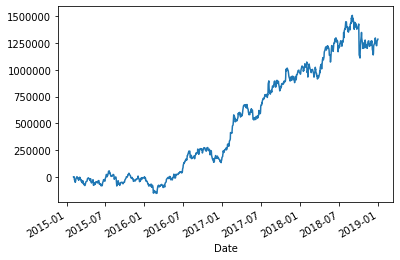

In [75]:

stocks[0]['Strategy Return'].cumsum().plot() 

In [76]:
stocks[0]['portfolio'][-1]

2286659.5875426633

In [77]:
#cagr
stocks[0]['pct Strategy Return']=stocks[0]['portfolio'].pct_change()
n=len(stocks[0])/252
cagr=((((1+stocks[0]['pct Strategy Return']).cumprod()[-1])**(1/n))-1)
cagr

0.2408084529617447

In [78]:
#  yearly volatilty
volatilaty=stocks[0]['pct Strategy Return'].std()*(252**0.5)
volatilaty

0.19142790501835216

In [79]:
#sharpe
sharpe=(cagr-(0.05))/(volatilaty)
sharpe


0.9967640451555478

In [80]:
#sortino
neg_volatilaty=stocks[0]['pct Strategy Return'][stocks[0]['pct Strategy Return']<0].std()*(252**0.5)
sortino=(cagr-(0.05))/(neg_volatilaty)
sortino

1.368925648903038